This is a simple baseline for Pizza project

In [192]:
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

# pandas for reading json file
import pandas as pd

import random
random.seed(100)

In [2]:
data_all = pd.read_json('data/train.json')

In [161]:
data_all['hour_of_request'] = pd.to_datetime(data_all.unix_timestamp_of_request_utc.values, unit='s').hour
data_all['length_of_title'] = [len(entry.split()) for entry in data_all.request_title.values]
data_all['length_of_text'] = [len(entry.split()) for entry in data_all.request_text_edit_aware.values]

In [273]:
num_up_votes = (data_all.requester_upvotes_plus_downvotes_at_request.values + data_all.requester_upvotes_minus_downvotes_at_request.values) / 2
num_down_votes = (data_all.requester_upvotes_plus_downvotes_at_request.values - data_all.requester_upvotes_minus_downvotes_at_request.values) / 2

data_all['up_vote_percent'] = num_up_votes / (num_up_votes + num_down_votes)

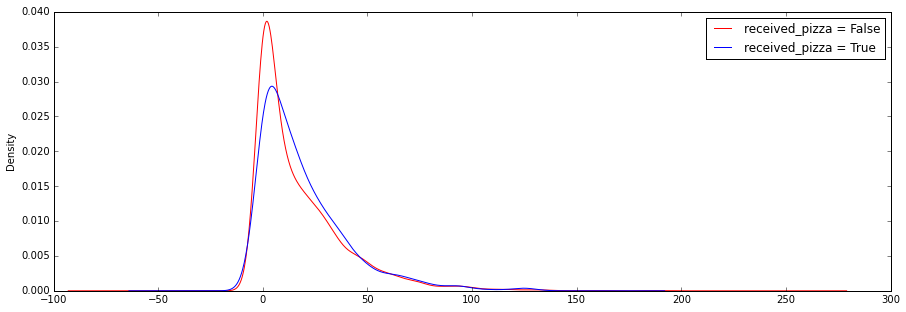

In [276]:
field = 'requester_number_of_subreddits_at_request'
ax = data_all[field].loc[data_all.requester_received_pizza==0].plot(kind='kde', 
                                                                    figsize=(15, 5), 
                                                                    color='red', 
                                                                    alpha=1)
data_all[field].loc[data_all.requester_received_pizza==1].plot(kind='kde', 
                                                               color='blue', 
                                                               ax=ax, 
                                                               alpha=1)
ax.legend(('received_pizza = False', 'received_pizza = True'))

In [205]:
list(test_all.columns.astype(str))

['giver_username_if_known',
 'request_id',
 'request_text_edit_aware',
 'request_title',
 'requester_account_age_in_days_at_request',
 'requester_days_since_first_post_on_raop_at_request',
 'requester_number_of_comments_at_request',
 'requester_number_of_comments_in_raop_at_request',
 'requester_number_of_posts_at_request',
 'requester_number_of_posts_on_raop_at_request',
 'requester_number_of_subreddits_at_request',
 'requester_subreddits_at_request',
 'requester_upvotes_minus_downvotes_at_request',
 'requester_upvotes_plus_downvotes_at_request',
 'requester_username',
 'unix_timestamp_of_request',
 'unix_timestamp_of_request_utc',
 'hour_of_request',
 'length_of_title',
 'length_of_text']

In [ ]:
shuffle = np.random.permutation(np.arange(len(data_all)))

In [259]:
shuffled_titles = data_all.request_title.values[shuffle]
shuffled_texts = data_all.request_text_edit_aware.values[shuffle]
shuffled_labels = data_all.requester_received_pizza.values[shuffle]

In [266]:
shuffled_texts[shuffled_labels==1][5:10]

array([ u'Broke until payday and only have soup waiting for me at home, but I am craving some cheesy goodness! If anyone could help, that would be gnarly!',
       u"Hi, RAOP. So, things are bad: I'm waiting on help from my relatives to pay rent (late) and utilities (also late). My girlfriend and I haven't been able to find work and are having a very hard time making ends meet. The power was shut off this morning, and we don't have enough money to get it turned on--or any food that doesn't require cooking.\n\nI'm looking into getting help from relatives sooner rather than later on the power bill, but I don't know exactly when that's going to happen. At this point, I'd judge this request to be more of a need than a want. \n\nFull disclosure: We've gotten pizza through RAOP twice. Once was through a request a few weeks ago, and the other was a totally unsolicited offer after my girlfriend got into a conversation with someone here. Both times we were a bit better off than we are now, but 

In [267]:
shuffled_texts[shuffled_labels==0][5:10]

array([ u"Not unusual around here, I take it -- but I'm an unemployed and pretty damned broke college student, and I'd really, really like some pizza while working on my last final projects. Beans and rice just lack a certain something.",
       u"My kids love pizza but unfortunately I haven't been able to afford it lately :-( if anyone would be willing to get us pizza we would be so happy! I'm not sure how this works but we have both a dominos and papa johns close to us! Thanks in advance\n\nExit: we are located in southern New Jersey also here is a linkto a photo of my children http://imgur.com/qVN1Q.jpg ",
       u'"Free pizzas for a year" meaning 24 large two-topping pizza coupons, but still. And of course we\'ll return the pizza-karma and share a good chunk of the free deliciousness.\nLink: http://www.facebook.com/photo.php?fbid=2864270574115&amp;set=o.20586466623&amp;type=1&amp;ref=nf\n',
       u"Lost my job a month ago, 50 cents left in my account. Girlfriend had a tax return c

In [208]:
data_all.requester_number_of_subreddits_at_request[1]

12

In [207]:
data_all.requester_subreddits_at_request[1]

[u'AskReddit',
 u'Eve',
 u'IAmA',
 u'MontereyBay',
 u'RandomKindness',
 u'RedditBiography',
 u'dubstep',
 u'gamecollecting',
 u'gaming',
 u'halo',
 u'i18n',
 u'techsupport']

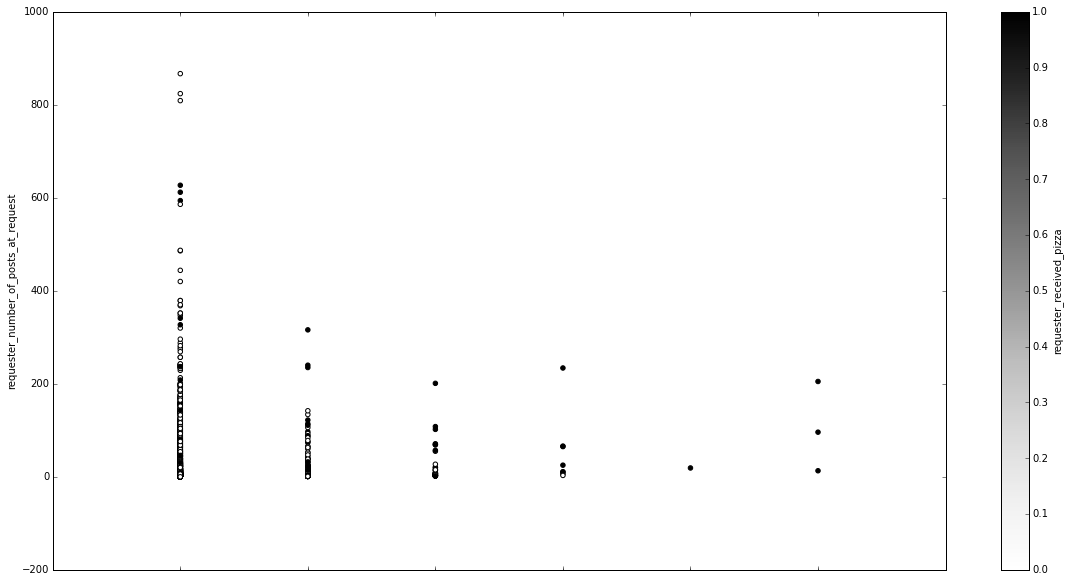

In [84]:
data_all.plot(kind='scatter', 
              figsize=(20, 10),
              x='requester_number_of_posts_on_raop_at_request', 
              y='requester_number_of_posts_at_request',
              c='requester_received_pizza');

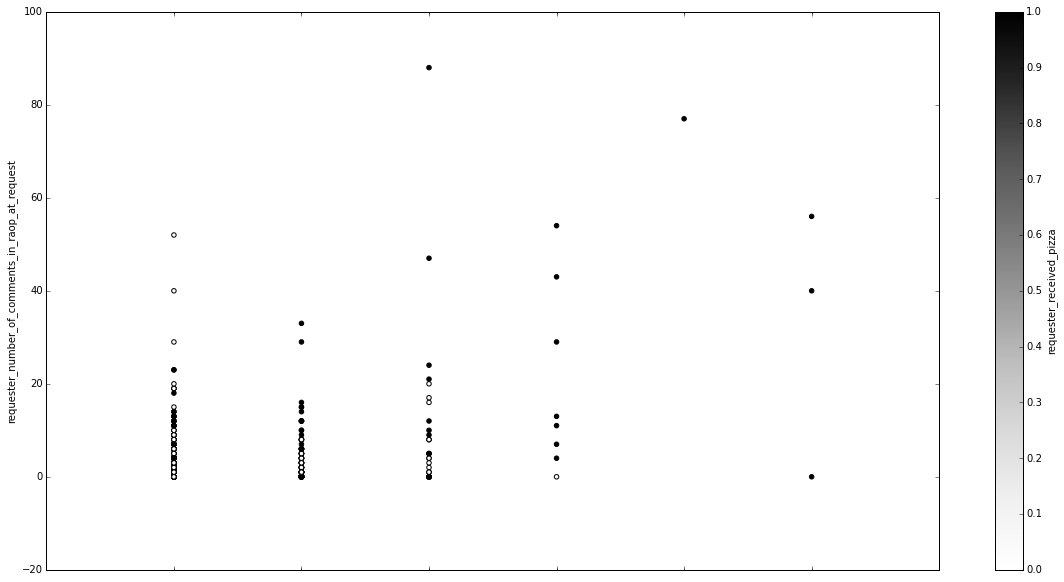

In [92]:
data_all.plot(kind='scatter', 
              figsize=(20, 10),
              x='requester_number_of_posts_on_raop_at_request', 
              y='requester_number_of_comments_in_raop_at_request',
              c='requester_received_pizza');

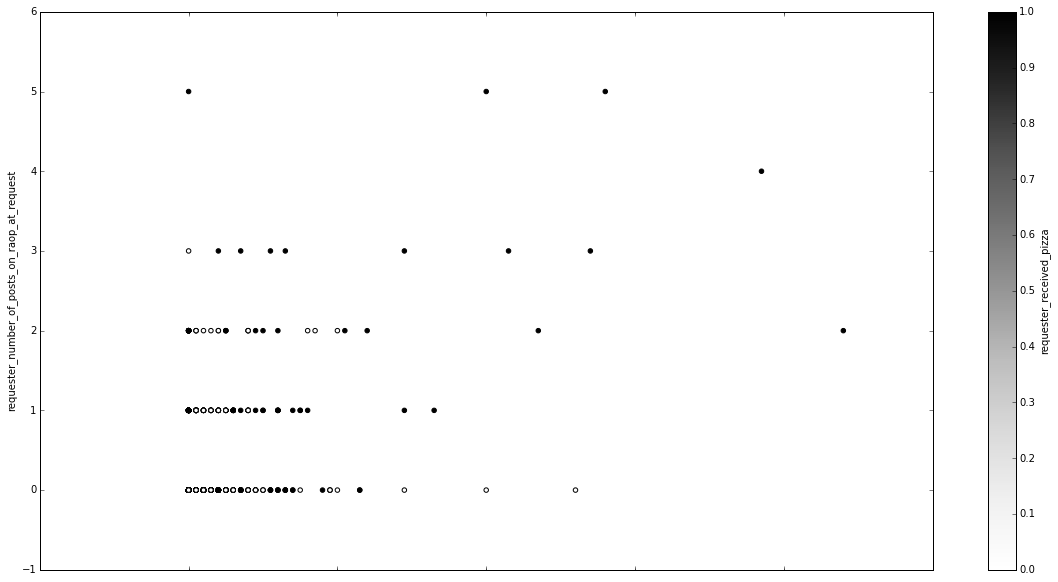

In [272]:
data_all.plot(kind='scatter', 
              figsize=(20, 10),
              y='requester_number_of_posts_on_raop_at_request', 
              x='requester_number_of_comments_in_raop_at_request',
              c='requester_received_pizza');

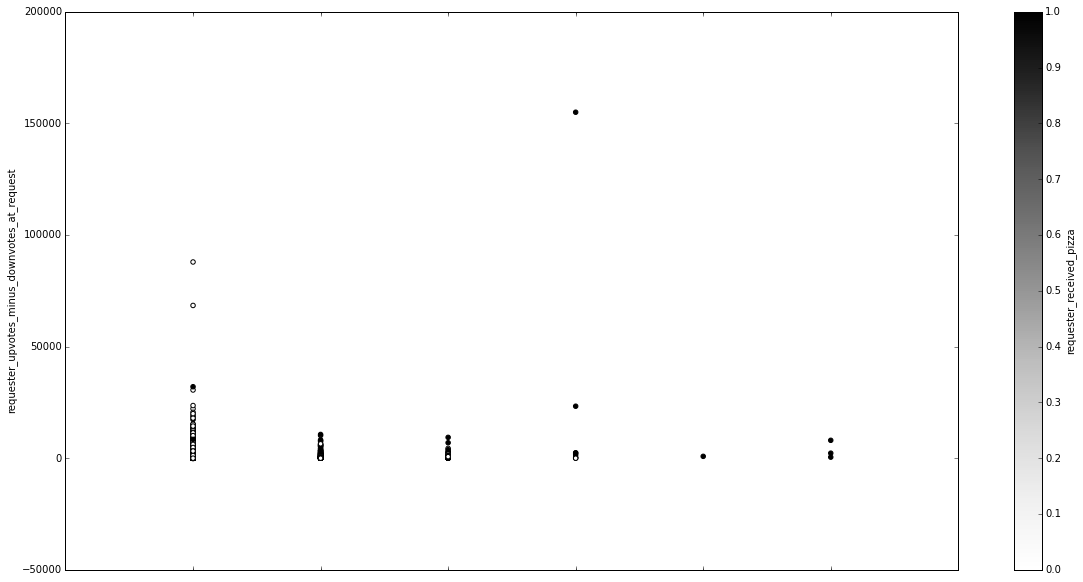

In [107]:
data_all.plot(kind='scatter', 
              figsize=(20, 10),
              x='requester_number_of_posts_on_raop_at_request', 
              y='requester_upvotes_minus_downvotes_at_request',
              c='requester_received_pizza');

In [126]:
data_all.request_text.values[:5]

array([ u'Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated',
       u'I spent the last money I had on gas today. Im broke until next Thursday :(',
       u"My girlfriend decided it would be a good idea to get off at Perth bus station when she was coming to visit me and has since had to spend all her money on a taxi to get to me here in Dundee. Any chance some kind soul would get us some pizza since we don't have any cash anymore?",
       u"It's cold, I'n hungry, and to be completely honest I'm broke. My mum said we're having leftovers for dinner. A random pizza arriving would be nice.\n\nEdit: We had leftovers.",
       u"hey guys:\n I love this sub. I think it's great. (Except the sob stories. I miss when this place was 

In [199]:
data_all.request_title.values[:5]

array([u'Request Colorado Springs Help Us Please',
       u'[Request] California, No cash and I could use some dinner',
       u'[Request] Hungry couple in Dundee, Scotland would love some pizza!',
       u'[Request] In Canada (Ontario), just got home from school. Need pizza.',
       u'[Request] Old friend coming to visit. Would LOVE to feed her some dinner. Indiana'], dtype=object)

In [144]:
test_all.columns

Index([                           u'giver_username_if_known',
                                               u'request_id',
                                  u'request_text_edit_aware',
                                            u'request_title',
                 u'requester_account_age_in_days_at_request',
       u'requester_days_since_first_post_on_raop_at_request',
                  u'requester_number_of_comments_at_request',
          u'requester_number_of_comments_in_raop_at_request',
                     u'requester_number_of_posts_at_request',
             u'requester_number_of_posts_on_raop_at_request',
                u'requester_number_of_subreddits_at_request',
                          u'requester_subreddits_at_request',
             u'requester_upvotes_minus_downvotes_at_request',
              u'requester_upvotes_plus_downvotes_at_request',
                                       u'requester_username',
                                u'unix_timestamp_of_request',
        

In [191]:
data = data_all[['requester_number_of_posts_on_raop_at_request',
                 'requester_number_of_comments_in_raop_at_request',
                 'requester_days_since_first_post_on_raop_at_request',
                 'requester_upvotes_minus_downvotes_at_request',
                 'requester_account_age_in_days_at_request',
                 'hour_of_request',
#                  'length_of_title',
                 'length_of_text']].values
labels = data_all.requester_received_pizza.values

# myan: shuffle the input
data = data[shuffle]
labels = labels[shuffle]

# myan: get train and test data
train_data = data[:3000, :]
train_labels = labels[:3000]

test_data = data[3000:, :]
test_labels = labels[3000:]

# myan: train and predict
lr = LogisticRegression()
lr.fit(train_data, train_labels)
print classification_report(test_labels, lr.predict(test_data))

             precision    recall  f1-score   support

      False       0.76      0.98      0.85       778
       True       0.52      0.05      0.10       262

avg / total       0.70      0.75      0.66      1040



In [194]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(train_data, train_labels)
print classification_report(test_labels, rf.predict(test_data))

             precision    recall  f1-score   support

      False       0.76      0.94      0.84       778
       True       0.43      0.15      0.22       262

avg / total       0.68      0.74      0.68      1040



In [200]:
test_all = pd.read_json('data/test.json')
test_all['hour_of_request'] = pd.to_datetime(test_all.unix_timestamp_of_request_utc.values, unit='s').hour
test_all['length_of_title'] = [len(entry.split()) for entry in test_all.request_title.values]
test_all['length_of_text'] = [len(entry.split()) for entry in test_all.request_text_edit_aware.values]

In [201]:
pred_test_all = rf.predict(test_all[['requester_number_of_posts_on_raop_at_request',
                 'requester_number_of_comments_in_raop_at_request',
                 'requester_days_since_first_post_on_raop_at_request',
                 'requester_upvotes_minus_downvotes_at_request',
                 'requester_account_age_in_days_at_request',
                 'hour_of_request',
#                  'length_of_title',
                 'length_of_text']].values)

In [202]:

predictions = pd.DataFrame()
predictions['request_id'] = test_all.request_id
#maxyan: sample submission was expecting 0 instead of False
predictions['requester_received_pizza'] = pred_test_all.astype(int)
predictions = predictions.set_index('request_id')

# make sure the length is as expected in https://www.kaggle.com/c/random-acts-of-pizza/submissions/attach
print len(predictions) == 1631
predictions.to_csv('baseline_submission.csv')

True


In [ ]:
#needs more work, this does not improve the result